<a href="https://colab.research.google.com/github/mitsuoxv/erp/blob/master/let_pres_speak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [0]:
from google.colab import drive

In [3]:
drive.mount('gd')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gd


In [8]:
!ls gd/'My Drive'/pres_texts

1947_pres.txt  1948_pres.txt  1949_pres.txt


In [0]:
corpus = []

In [0]:
for year in range(1947, 1950):
    input_filename = 'gd/My Drive/pres_texts/{}_pres.txt'.format(year)
    
    with open(input_filename, 'r') as f:
        text = f.read()
    
    corpus = corpus + text.lower().split('\n')

In [0]:
corpus = [a for a in corpus if a != '']

In [15]:
len(corpus)

523

In [16]:
import tensorflow as tf

tf.__version__

'2.2.0'

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [0]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [19]:
print(total_words)

2191


In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [0]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
368/368 [==============================] - 18s 49ms/step - loss: 6.6283 - accuracy: 0.0567
Epoch 2/500
368/368 [==============================] - 18s 50ms/step - loss: 6.1802 - accuracy: 0.0707
Epoch 3/500
368/368 [==============================] - 18s 50ms/step - loss: 6.0725 - accuracy: 0.0834
Epoch 4/500
368/368 [==============================] - 19s 50ms/step - loss: 5.9882 - accuracy: 0.0909
Epoch 5/500
368/368 [==============================] - 18s 50ms/step - loss: 5.9130 - accuracy: 0.0961
Epoch 6/500
368/368 [==============================] - 18s 50ms/step - loss: 5.8398 - accuracy: 0.1048
Epoch 7/500
368/368 [==============================] - 18s 50ms/step - loss: 5.7689 - accuracy: 0.1102
Epoch 8/500
368/368 [==============================] - 19s 50ms/step - loss: 5.6996 - accuracy: 0.1203
Epoch 9/500
368/368 [==============================] - 19s 51ms/step - loss: 5.6340 - accuracy: 0.1231
Epoch 10/500
368/368 [==============================] - 19s 51ms/step - l

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 67, 64)            140224    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 2191)              89831     
Total params: 243,655
Trainable params: 243,655
Non-trainable params: 0
_________________________________________________________________


In [26]:
print(model)

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

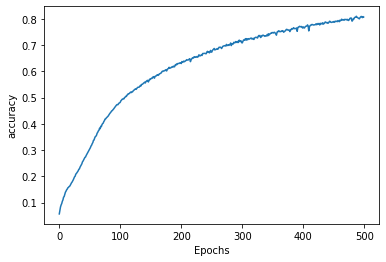

In [28]:
plot_graphs(history, 'accuracy')

In [0]:
seed_text = "I have some proposals to the Congress"
next_words = 100

In [30]:
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I have some proposals to the Congress presented 1947 that i have included in the people and the policy for a few days i have a month earlier resources in a rate of prices and wages which more permanently sustainable rates of the vast public debt and to check year improved services to sustained economic situation to deal with the situation points up generally i evaluate it should should i evaluate i deal show i evaluate wholesale control of our program among as of deflationary pressures of living through hospitals and to savings and credit wages prosperity to reduce of low incomes health or strikes soon as
